In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('salaries_parent.csv')
## Thanks to Jaskiratr for putting this data together and letting me use it ! 


In [3]:
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]
sal2.shape

#iff empty replace with mean value
# sal2.fillna(sal2.mean(), inplace=True)
# sal2.isnull().values.any()

(1412, 153)

In [4]:
sal2.head()

,Zip,B19013_001,no_male_hs_p,no_female_hs_p,at_least_hs_male_p,at_least_hs_female_p,at_least_bach_male_p,at_least_bach_female_p,male_unemployment,female_unemployment,...,T53,T99,Place Name,State_y,State Abbreviation,County,Latitude,Longitude,Unnamed: 60,missingSalary
0,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN,False
1,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN,False
2,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN,False
3,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN,False
4,1003,NaN,0,0,100,100,35.46798,76.470588,6.92323,7.939714,...,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN,False


In [5]:
sal2.dtypes

Zip                                                                 int64
B19013_001                                                        float64
no_male_hs_p                                                      float64
no_female_hs_p                                                    float64
at_least_hs_male_p                                                float64
at_least_hs_female_p                                              float64
at_least_bach_male_p                                              float64
at_least_bach_female_p                                            float64
male_unemployment                                                 float64
female_unemployment                                               float64
snap                                                              float64
renter                                                            float64
median_rent                                                       float64
foreign_born                          

In [6]:
numTypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_numeric = sal2.select_dtypes(include=numTypes)
X_numeric.drop('salary', axis=1, inplace=True)
X_categorical = sal2.select_dtypes(exclude=numTypes)
X_numeric.shape

/Users/jaimetanner/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(1412, 135)

In [7]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [8]:
X_dummy_features = []
for i in X_categorical.columns:
    temp_dummies = pd.get_dummies(X_categorical[i])
    X_dummy_features.append(temp_dummies)
X_dummy_features = pd.concat(X_dummy_features, axis=1)
# X_dummy_features.shape
X_dummy_features = X_dummy_features.as_matrix()

In [9]:
# list of X vars to include
# X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsinposition', 
#          'yearsinprofession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instbudget', 'instsize','sex_by_age:__male:_',
#  'sex_by_age:__male:_under_5_years_',
#  'sex_by_age:__male:_5_to_9_years_',
#  'sex_by_age:__male:_10_to_14_years_',
#  'sex_by_age:__male:_15_to_17_years_',
#  'sex_by_age:__male:_18_and_19_years_',
#  'sex_by_age:__male:_20_years_',
#  'sex_by_age:__male:_21_years_',
#  'sex_by_age:__male:_22_to_24_years_',
#  'sex_by_age:__male:_25_to_29_years_',
#  'sex_by_age:__male:_30_to_34_years_',
#  'sex_by_age:__male:_35_to_39_years_',
#  'sex_by_age:__male:_40_to_44_years_',
#  'sex_by_age:__male:_45_to_49_years_',
#  'sex_by_age:__male:_50_to_54_years_',
#  'sex_by_age:__male:_55_to_59_years_',
#  'sex_by_age:__male:_60_and_61_years_',
#  'sex_by_age:__male:_62_to_64_years_',
#  'sex_by_age:__male:_65_and_66_years_',
#  'sex_by_age:__male:_67_to_69_years_',
#  'sex_by_age:__male:_70_to_74_years_',
#  'sex_by_age:__male:_75_to_79_years_',
#  'sex_by_age:__male:_80_to_84_years_',
#  'sex_by_age:__male:_85_years_and_over_',
#  'sex_by_age:__female:_',
#  'sex_by_age:__female:_under_5_years_',
#  'sex_by_age:__female:_5_to_9_years_',
#  'sex_by_age:__female:_10_to_14_years_',
#  'sex_by_age:__female:_15_to_17_years_',
#  'sex_by_age:__female:_18_and_19_years_',
#  'sex_by_age:__female:_20_years_',
#  'sex_by_age:__female:_21_years_',
#  'sex_by_age:__female:_22_to_24_years_',
#  'sex_by_age:__female:_25_to_29_years_',
#  'sex_by_age:__female:_30_to_34_years_',
#  'sex_by_age:__female:_35_to_39_years_',
#  'sex_by_age:__female:_40_to_44_years_',
#  'sex_by_age:__female:_45_to_49_years_',
#  'sex_by_age:__female:_50_to_54_years_',
#  'sex_by_age:__female:_55_to_59_years_',
#  'sex_by_age:__female:_60_and_61_years_',
#  'sex_by_age:__female:_62_to_64_years_',
#  'sex_by_age:__female:_65_and_66_years_',
#  'sex_by_age:__female:_67_to_69_years_',
#  'sex_by_age:__female:_70_to_74_years_',
#  'sex_by_age:__female:_75_to_79_years_',
#  'sex_by_age:__female:_80_to_84_years_',
#  'sex_by_age:__female:_85_years_and_over_',
#  'commute_over_60',
#  'full_time',
#  'part_time',
#  'high_rent_burden',
#  'extreme_rent_burden','2010 Census Population']
# X_numeric = merged[X_numeric_features]
# X_categorical_features = ['function', 'gender', 'race', 'highestdegree', 'category', 'insttype']
# X_categorical = merged[X_categorical_features]

In [10]:
# # create dummy variables for each of the categorical features
# # DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
# #converts dummies to 1s and 0s 

# Function_dummies = pd.get_dummies(X_categorical['function'])
# gender_dummies = pd.get_dummies(X_categorical['gender'])
# race_dummies = pd.get_dummies(X_categorical['race'])
# highestDegree_dummies = pd.get_dummies(X_categorical['highestdegree'])
# Category_dummies = pd.get_dummies(X_categorical['category'])
# instType_dummies = pd.get_dummies(X_categorical['insttype'])

# X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# # convert to ndarray
# X_dummy_features = X_dummy_features.as_matrix()

In [11]:
# list(sal2.columns.values)

sal2.columns.get_loc("salary")

98

In [12]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [13]:
# y is salary
y = sal2.iloc[:, 98].values

In [14]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [15]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [16]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 50987.7787824
Coefficients: 
 [ -1.30306552e+04  -2.52732650e+04  -2.61683245e+04  -2.46496921e+04
  -2.18756956e+04  -1.65196015e+04  -2.78921863e+04  -2.93763276e+04
  -2.65229155e+04  -2.02299846e+04  -2.38995748e+04  -2.43736805e+04
  -2.77885601e+04  -2.90363419e+04  -2.37306942e+04  -2.23553098e+04
  -2.74231290e+04  -3.02844077e+04  -2.50440246e+04  -2.66543231e+04
   5.94743909e-05  -1.97914702e+04  -2.55969909e+04  -2.11969402e+04
  -2.68093351e+04  -2.46885330e+04  -2.20278020e+04  -2.81397407e+04
  -3.62931284e+03  -4.34563404e+03   5.45491810e+02  -5.45491816e+02
   7.88770493e+02   3.58530761e+03  -1.65190153e+03   3.22977767e+03
  -2.59929675e+03  -1.02799599e+03   1.85659068e+03  -1.61108042e+03
   1.61108042e+03  -3.99082415e+02   3.99082415e+02   6.40798376e+02
   1.62146251e+03   1.07575783e+04   5.87720005e+03  -4.20892291e+03
  -1.63810331e+03   1.56606196e+03   6.02351804e+02   1.19933838e+01
  -5.42742624e+02   2.28148220e+02  -1.40230279e+03  -1.0848

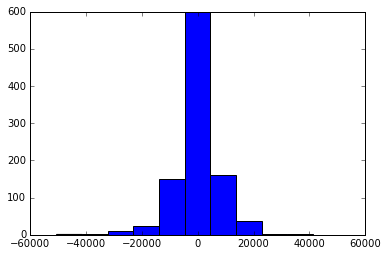

Distribution of prediction error on test data:


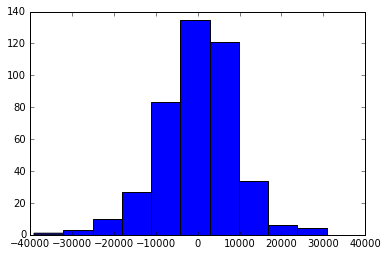

In [17]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [18]:
# from sklearn.preprocessing import PolynomialFeatures
# # DOC: http://scikit-learn.org/stable/modules/preprocessing.html
# #taking same features and applying different powers to them 

# poly = PolynomialFeatures(2)
# X_poly = poly.fit_transform(X)

Intercept: 
 2.19833794015e+17
Coefficients: 
 [ -1.32914309e+004  -2.57227990e+004  -2.60909198e+004  -2.37187300e+004
  -2.28621887e+004  -1.76845488e+004  -2.84828000e+004  -2.93097140e+004
  -2.69736607e+004  -2.02734070e+004  -2.31050711e+004  -2.41693468e+004
  -2.79232469e+004  -2.82780642e+004  -2.45551519e+004  -2.27349956e+004
  -2.78248897e+004  -3.11039032e+004  -2.49567277e+004  -2.55193012e+004
   1.78540609e+018  -1.98514220e+004  -2.60829659e+004  -2.16879350e+004
  -2.65149765e+004  -2.35764112e+004  -2.16240806e+004  -2.84516919e+004
  -5.43167339e+003  -6.51248449e+003  -2.39658820e+017  -2.39658820e+017
   7.49977925e+002   2.80951147e+003  -2.06478783e+003   3.02793514e+003
  -2.19578661e+003  -1.75272716e+003   2.18685978e+003  -5.87550350e+015
  -5.87550350e+015   2.55344791e+017   2.55344791e+017   1.64938771e+003
   2.25196195e+003   1.11942071e+004   6.20891051e+003  -3.70917377e+003
   1.93160462e+018  -2.54815410e+017   7.97459853e+017   4.93281938e+017
   4

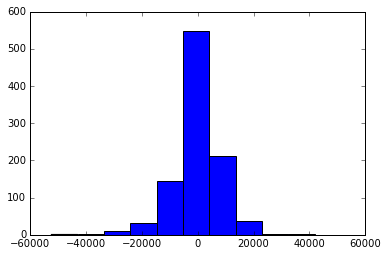

Distribution of prediction error on test data:


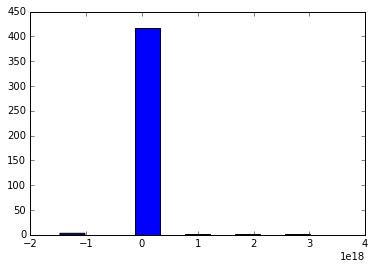

In [19]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
print('Variance score, test data: %.2f' % poly.score(X_test, y_test))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Intercept: 
 17798.123864
Coefficients: 
 [  9.05553678e+03  -2.31314889e+03  -2.92261391e+03  -1.40423257e+03
   1.05082535e+03   6.04143164e+03  -4.79305973e+03  -5.41919224e+03
  -3.21539285e+03   2.07703678e+03  -7.44184695e+02  -1.53115461e+03
  -4.53578115e+03  -5.42863779e+03  -6.39844304e+02   4.94663274e+02
  -3.31554412e+03  -7.18984115e+03  -1.88024591e+03  -3.12538852e+03
   0.00000000e+00   2.87211818e+03  -2.48958418e+03   1.69649279e+03
  -3.57499704e+03  -1.63712496e+03   9.68674222e+02  -4.86386511e+03
  -1.90545913e+03  -2.50680620e+03   4.61025704e+02  -4.61025704e+02
   1.07373498e+02   2.80955274e+03  -1.85468681e+03   2.66396807e+03
  -2.93837017e+03  -6.68101583e+02   1.13152016e+03  -1.81621418e+03
   1.81621418e+03  -1.96790854e+02   1.96790854e+02  -8.30161239e+02
   2.26569322e+02   8.50834522e+03   4.45858088e+03  -5.51838842e+03
  -9.36412151e+02   4.69136688e+02   1.34737988e+02   1.50234019e+02
   6.90218090e+01   4.14027085e+01  -6.97357284e+02  -7.28416

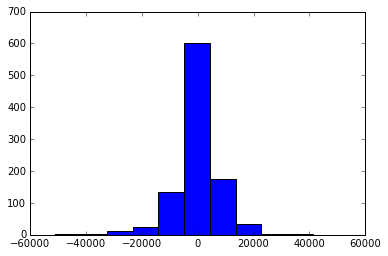

Distribution of prediction error on test data:


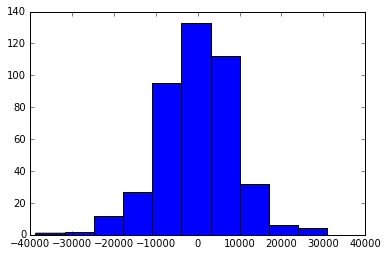

In [20]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
print('Variance score, training data: %.2f' % regr.score(X_test, y_test))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

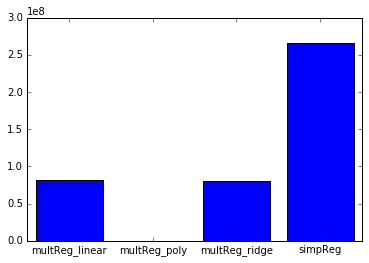

In [21]:
# bar graph of dict with Residual Sum of Squares on test datasets

var_to_graph['multReg_poly'] = 0
#SET ABOVE TO ZERO TO REMOVE MULREG_POLY BECAUSE IT WAS TOO CRAZY DUE TO OUTLIERS AND OVERFITTING
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()